In [1]:
import os
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from collections import Counter

## Conducting basic NLP analysis on the collection

In [2]:
# Download Resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86181\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\86181\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86181\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\86181\AppData\Roaming\nltk_data...


True

In [2]:
# Define functions to process the documents

# Read the doc
def read_documents(folder_path):
    documents = []
    # Iterates through all directories, return a list
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            with open(os.path.join(subdir, file), 'r', encoding='utf-8') as f:
                documents.append(f.read())
    return documents

# Process the doc text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    
    # Tag each token
    pos_tags = pos_tag(tokens)
    
    # Converts each token to lowercase and lemmatizes it (according to its POS tag)
    lemmatizer = WordNetLemmatizer()
    # Perform lemmatization; call get_wordnet_pos function: change to corresponding WordNet POS
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower(), pos=get_wordnet_pos(tag)) for token, tag in pos_tags]
    
    # Filtering: Get rid of stopwords and non-alphabetic token
    stop_words = set(stopwords.words('english')) # Load stopwords
    filtered_tokens = [token for token in lemmatized_tokens if token.isalpha() and token not in stop_words]
    
    return filtered_tokens, pos_tags

# Change the format: returns the corresponding WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

In [3]:
# Define the function for analyzing

# processed_docs: a list, each element present a document.
# And each doc is presented as a tuple: doc[0]: a list of token; doc[1]: a list of POS-tagged token, that is, a list of (token, POS tag)
def analyze_collection(processed_docs):
    # Get the single list of all tokens
    # Loop over each token, add it to the result list
    all_tokens = [token for doc in processed_docs for token in doc[0]]
    token_count = len(all_tokens)
    # Create a set
    unique_tokens = set(all_tokens)
    
    # Collection level statistics (per document)
    min_tokens = min(len(doc[0]) for doc in processed_docs)
    max_tokens = max(len(doc[0]) for doc in processed_docs)
    mean_tokens = np.mean([len(doc[0]) for doc in processed_docs])
    
    # Most common n-grams
    # FreqDist: calculate the frequency distribution of token
    unigrams = FreqDist(all_tokens)
    bigrams = FreqDist(nltk.bigrams(all_tokens))
    trigrams = FreqDist(nltk.trigrams(all_tokens))
    
    # POS statistics
    all_pos = [pos for doc in processed_docs for _, pos in doc[1]]
    # Count the occurrence of each POS tag
    pos_counter = Counter(all_pos)
    
    return {
        'token_count': token_count,
        'unique_tokens': len(unique_tokens),
        'min_tokens': min_tokens,
        'max_tokens': max_tokens,
        'mean_tokens': mean_tokens,
        'unigrams': unigrams.most_common(10),
        'bigrams': bigrams.most_common(10),
        'trigrams': trigrams.most_common(10),
        'pos_tags': pos_counter.most_common(10)
    }

In [4]:
# Load the documents
folder_path = "gov/documents"
documents = read_documents(folder_path)

In [5]:
# Process
processed_docs = [preprocess_text(doc) for doc in documents]

In [6]:
# Perform analysis
collection_stats = analyze_collection(processed_docs)

Collection Statistics (full set):
Total Tokens: 10322889
Unique Tokens: 159699
Min Tokens in a Document: 1
Max Tokens in a Document: 9242
Mean Tokens per Document: 304.9778125738596

Most Common Unigrams: [('information', 79061), ('program', 55054), ('service', 51704), ('state', 49718), ('site', 48972), ('use', 48963), ('http', 48372), ('page', 45916), ('data', 39152), ('home', 38293)]
Most Common Bigrams: [(('home', 'page'), 14301), (('web', 'site'), 13466), (('united', 'state'), 12199), (('contact', 'u'), 5643), (('site', 'map'), 4887), (('geological', 'survey'), 4057), (('new', 'york'), 3957), (('privacy', 'policy'), 3758), (('national', 'laboratory'), 3245), (('last', 'update'), 3153)]
Most Common Trigrams: [(('txt', 'txt', 'txt'), 1781), (('definition', 'source', 'info'), 1638), (('health', 'human', 'service'), 1536), (('national', 'weather', 'service'), 1460), (('adobe', 'acrobat', 'reader'), 1456), (('frequently', 'asked', 'question'), 1382), (('space', 'flight', 'center'), 1322

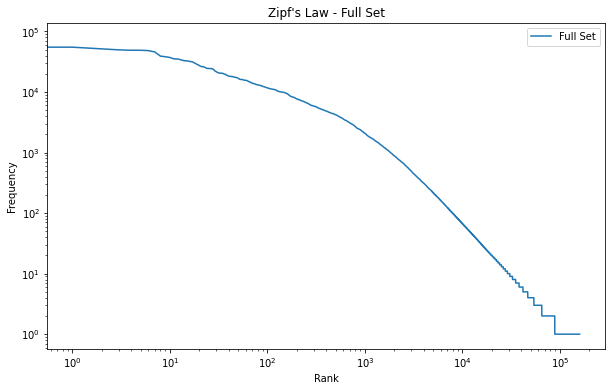

In [10]:
# Print out the analysis results
print("Collection Statistics (full set):")
print(f"Total Tokens: {collection_stats['token_count']}")
print(f"Unique Tokens: {collection_stats['unique_tokens']}")
print(f"Min Tokens in a Document: {collection_stats['min_tokens']}")
print(f"Max Tokens in a Document: {collection_stats['max_tokens']}")
print(f"Mean Tokens per Document: {collection_stats['mean_tokens']}")
print("\nMost Common Unigrams:", collection_stats['unigrams'])
print("Most Common Bigrams:", collection_stats['bigrams'])
print("Most Common Trigrams:", collection_stats['trigrams'])
print("Most Common POS Tags:", collection_stats['pos_tags'])

# Visualize the Zipf's law
plot_zipf_law(collection_stats, "Full Set")

### Compare collection and document level statistics

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
# Assuming 'processed_docs' is a list of tuples returned from preprocess_text(doc) for each document

# Collection-level statistics
all_tokens = [token for doc in processed_docs for token in doc[0]]
collection_stats = {
    'Total Tokens': len(all_tokens),
    'Unique Tokens': len(set(all_tokens)),
    'Mean Tokens per Document': np.mean([len(doc[0]) for doc in processed_docs]),
    'Median Tokens per Document': np.median([len(doc[0]) for doc in processed_docs])
}

# Document-level statistics
document_stats = {
    'Document': [],
    'Total Tokens': [],
    'Unique Tokens': [],
    'Most Common Token': [],
    'Most Common POS Tag': [],
}

for i, doc in enumerate(processed_docs):
    doc_tokens = doc[0]
    doc_pos = doc[1]
    
    # Total tokens in the document
    total_tokens = len(doc_tokens)
    
    # Unique tokens in the document
    unique_tokens = len(set(doc_tokens))
    
    # Most common token in the document
    most_common_token = Counter(doc_tokens).most_common(1)[0][0]
    
    # Most common POS tag in the document
    most_common_pos = Counter([pos for _, pos in doc_pos]).most_common(1)[0][0]
    
    document_stats['Document'].append(f'Document {i+1}')
    document_stats['Total Tokens'].append(total_tokens)
    document_stats['Unique Tokens'].append(unique_tokens)
    document_stats['Most Common Token'].append(most_common_token)
    document_stats['Most Common POS Tag'].append(most_common_pos)

# Convert to DataFrame for easier analysis and visualization
document_stats_df = pd.DataFrame(document_stats)

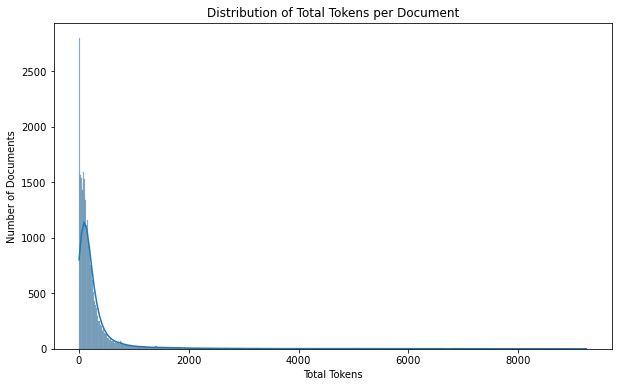

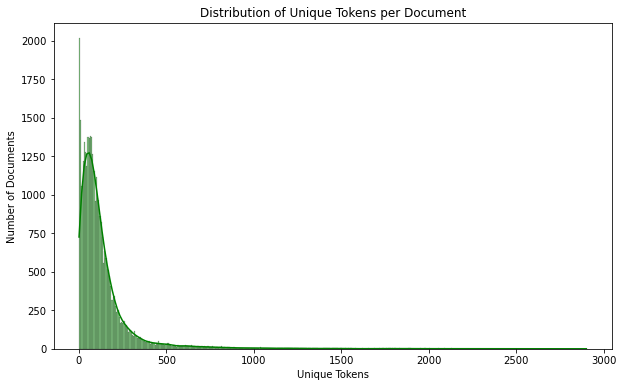

                    Statistic  Collection-Level Document-Level (Mean)
0                Total Tokens      1.032289e+07            304.977813
1               Unique Tokens      1.596990e+05            135.313106
2    Mean Tokens per Document      3.049778e+02                     -
3  Median Tokens per Document      1.370000e+02                     -


In [29]:
# Visualize the distribution of total tokens per document
plt.figure(figsize=(10, 6))
sns.histplot(document_stats_df['Total Tokens'], kde=True)
plt.title('Distribution of Total Tokens per Document')
plt.xlabel('Total Tokens')
plt.ylabel('Number of Documents')
plt.show()

# Visualize the distribution of unique tokens per document
plt.figure(figsize=(10, 6))
sns.histplot(document_stats_df['Unique Tokens'], kde=True, color='green')
plt.title('Distribution of Unique Tokens per Document')
plt.xlabel('Unique Tokens')
plt.ylabel('Number of Documents')
plt.show()

# Table for comparison
comparison_table = pd.DataFrame({
    'Statistic': ['Total Tokens', 'Unique Tokens', 'Mean Tokens per Document', 'Median Tokens per Document'],
    'Collection-Level': [collection_stats['Total Tokens'], collection_stats['Unique Tokens'], collection_stats['Mean Tokens per Document'], collection_stats['Median Tokens per Document']],
    'Document-Level (Mean)': [document_stats_df['Total Tokens'].mean(), document_stats_df['Unique Tokens'].mean(), '-', '-']
})

print(comparison_table)

In [31]:
# Compare the most frequent token of collection and document level

# Collection level
#all_tokens = [token for doc in processed_docs for token in doc[0]]
collection_token_freq = Counter(all_tokens)
most_common_collection_tokens = collection_token_freq.most_common(10)  # Top 10 tokens

# Each document level
document_token_freqs = []
for i, doc in enumerate(processed_docs):
    doc_token_freq = Counter(doc[0])
    most_common_doc_tokens = doc_token_freq.most_common(10)  # Top 10 tokens in the document
    document_token_freqs.append({
        'Document': f'Document {i+1}',
        'Most Common Tokens': most_common_doc_tokens
    })

# Compare the top tokens of collection and doc level

# Create a DataFrame for easier comparison
comparison_data = []

for doc_freq in document_token_freqs:
    doc_name = doc_freq['Document']
    doc_common_tokens = dict(doc_freq['Most Common Tokens'])
    
    # Check for the presence of collection's most common tokens in the document
    comparison_row = {'Document': doc_name}
    for token, _ in most_common_collection_tokens:
        comparison_row[token] = doc_common_tokens.get(token, 0)  # Frequency in the document or 0 if not present
    
    comparison_data.append(comparison_row)

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print(comparison_df)

             Document  information  program  service  state  site  use  http  \
0          Document 1            0        4        6      0     0    0     0   
1          Document 2            0        0        0      0     0    0     0   
2          Document 3            0        0        0      0     2    0     1   
3          Document 4            0        0        0      0     2    0     0   
4          Document 5            0        0        0      0     0    0     2   
...               ...          ...      ...      ...    ...   ...  ...   ...   
33843  Document 33844            0        0        0      0     0    0     0   
33844  Document 33845            0        0        0      0     0    0     0   
33845  Document 33846            0        0        0      0     0    0     1   
33846  Document 33847            0        5        8      0     0    0     0   
33847  Document 33848            0        0        0      0     0    0     0   

       page  data  home  
0         0  

In [ ]:
# 每个文档中最常出现的token的list，这个list中出现频率最高的token vs collection 中最常出现的token

In [32]:
# Considering a list of the most frequent tokens within each document (the combined list), find the most frequent tokens in that list

# Calculate the most frequent tokens within each document
document_token_freqs = []

for i, doc in enumerate(processed_docs):
    doc_token_freq = Counter(doc[0])
    most_common_doc_tokens = doc_token_freq.most_common(10)  # Top 10 tokens in the document
    document_token_freqs.extend([token for token, freq in most_common_doc_tokens])  # Add to the combined list

# The frequency of each token in the combined list
combined_token_freq = Counter(document_token_freqs)

# Find the most frequent tokens in this combined list
most_frequent_across_docs = combined_token_freq.most_common(10)  # Top 10 most frequent tokens across documents

# Display the results
print("Most frequent tokens across all documents' top tokens:")
for token, freq in most_frequent_across_docs:
    print(f"Token: {token}, Frequency: {freq}")

Most frequent tokens across all documents' top tokens:
Token: http, Frequency: 10179
Token: information, Frequency: 5996
Token: page, Frequency: 4439
Token: home, Frequency: 4226
Token: site, Frequency: 4075
Token: service, Frequency: 3461
Token: program, Frequency: 3441
Token: state, Frequency: 2734
Token: link, Frequency: 2728
Token: research, Frequency: 2368


## Select a Subset and apply Zipf's law

In [ ]:
def calculate_sampling_percentage(uni_id):
    uni_id = uni_id.replace('u', '5')
    return 10000000 / int(uni_id)

def sample_documents(processed_docs, percentage):
    sample_size = int(len(processed_docs) * (percentage / 100))
    return random.sample(processed_docs, sample_size)

In [ ]:
uni_id = "u7750324"
percentage = calculate_sampling_percentage(uni_id)
sampled_docs = sample_documents(processed_docs, percentage)

sampled_stats = analyze_collection(sampled_docs)

In [14]:
# Create the subset
uid = "u7750324"
percentage = 10000000/int(uid.replace('u','5'))

sample_size = int(len(processed_docs) * (percentage / 100))
sample_docs = random.sample(processed_docs, sample_size)

In [15]:
sample_analysis = analyze_collection(sample_docs)

In [9]:
# Comparing full collection with the subset
# "Zipf's law is easy to observe with a lattice plot in which the coordinates are the logarithm of rank and frequency, respectively."
def plot_zipf_law(stats, title):
    token_freq = FreqDist([token for doc in processed_docs for token in doc[0]])
    frequencies = sorted(token_freq.values(), reverse=True) # To descending order
    
    plt.figure(figsize=(10, 6))
    # Plots the frequencies on a log-log scale
    plt.loglog(frequencies, label=title)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Zipf\'s Law - {title}')
    plt.legend()
    plt.show()

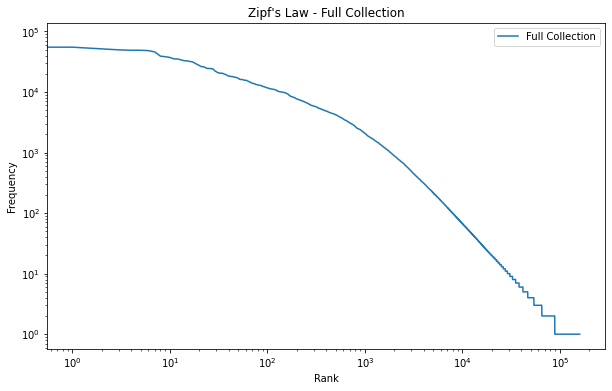

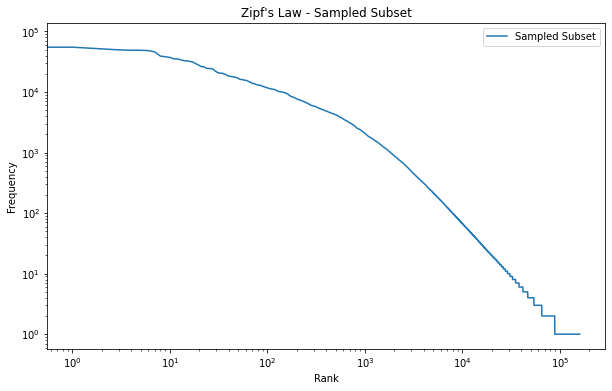

In [16]:
plot_zipf_law(collection_stats, "Full Collection")
plot_zipf_law(sample_analysis, "Sampled Subset")

In [17]:
def plot_zipf_law_combined(full_stats, subset_stats, full_title, subset_title):
    # Full Collection
    full_token_freq = FreqDist([token for doc in full_stats for token in doc[0]])
    full_frequencies = sorted(full_token_freq.values(), reverse=True)  # In descending order

    # Sampled Subset
    subset_token_freq = FreqDist([token for doc in subset_stats for token in doc[0]])
    subset_frequencies = sorted(subset_token_freq.values(), reverse=True)  # In descending order

    plt.figure(figsize=(10, 6))
    
    plt.loglog(full_frequencies, label=full_title, color='blue')
    plt.loglog(subset_frequencies, label=subset_title, color='orange')
    
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law Comparison - Full Collection vs Sampled Subset')
    plt.legend()
    plt.show()


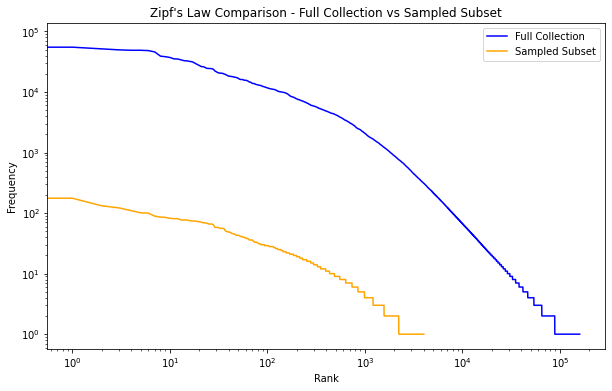

In [18]:
# Calling the combined plot function
plot_zipf_law_combined(processed_docs, sampled_docs, "Full Collection", "Sampled Subset")

### Test case： gov/documents/00 folder

In [13]:
# Define the functions as described before
def read_documents(folder_path):
    documents = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            with open(os.path.join(subdir, file), 'r', encoding='utf-8') as f:
                documents.append(f.read())
    return documents

def preprocess_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower(), pos=get_wordnet_pos(tag)) for token, tag in pos_tags]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in lemmatized_tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens, pos_tags

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

def analyze_collection(processed_docs):
    all_tokens = [token for doc in processed_docs for token in doc[0]]
    token_count = len(all_tokens)
    unique_tokens = set(all_tokens)
    min_tokens = min(len(doc[0]) for doc in processed_docs)
    max_tokens = max(len(doc[0]) for doc in processed_docs)
    mean_tokens = np.mean([len(doc[0]) for doc in processed_docs])
    unigrams = FreqDist(all_tokens)
    bigrams = FreqDist(nltk.bigrams(all_tokens))
    trigrams = FreqDist(nltk.trigrams(all_tokens))
    all_pos = [pos for doc in processed_docs for _, pos in doc[1]]
    pos_counter = Counter(all_pos)
    return {
        'token_count': token_count,
        'unique_tokens': len(unique_tokens),
        'min_tokens': min_tokens,
        'max_tokens': max_tokens,
        'mean_tokens': mean_tokens,
        'unigrams': unigrams.most_common(10),
        'bigrams': bigrams.most_common(10),
        'trigrams': trigrams.most_common(10),
        'pos_tags': pos_counter.most_common(10)
    }

def plot_zipf_law(stats, title):
    token_freq = FreqDist([token for doc in processed_docs for token in doc[0]])
    frequencies = sorted(token_freq.values(), reverse=True)
    plt.figure(figsize=(10, 6))
    plt.loglog(frequencies, label=title)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Zipf\'s Law - {title}')
    plt.legend()
    plt.show()


In [10]:
# Call the functions to perform processing and analyzing

# Set the path to the "gov/documents/00" folder
test_folder_path = "gov/documents/00"

# Read and preprocess the documents
documents = read_documents(test_folder_path)
processed_docs = [preprocess_text(doc) for doc in documents]

# Analyze the collection
collection_stats = analyze_collection(processed_docs)

Collection Statistics:
Total Tokens: 58184
Unique Tokens: 7345
Min Tokens in a Document: 1
Max Tokens in a Document: 977
Mean Tokens per Document: 134.6851851851852

Most Common Unigrams: [('information', 670), ('page', 591), ('http', 498), ('site', 493), ('link', 493), ('service', 437), ('data', 419), ('program', 385), ('home', 369), ('web', 333)]
Most Common Bigrams: [(('home', 'page'), 199), (('snd', 'snd'), 134), (('web', 'site'), 133), (('united', 'state'), 73), (('web', 'page'), 64), (('site', 'map'), 61), (('rollover', 'button'), 60), (('contact', 'u'), 56), (('dir', 'dir'), 56), (('privacy', 'statement'), 51)]
Most Common Trigrams: [(('snd', 'snd', 'snd'), 122), (('dir', 'dir', 'dir'), 44), (('http', 'refresh', 'sec'), 28), (('skip', 'navigation', 'skip'), 25), (('navigation', 'skip', 'navigation'), 25), (('health', 'human', 'service'), 22), (('national', 'institute', 'health'), 20), (('responsible', 'nasa', 'official'), 19), (('pacer', 'service', 'center'), 19), (('department'

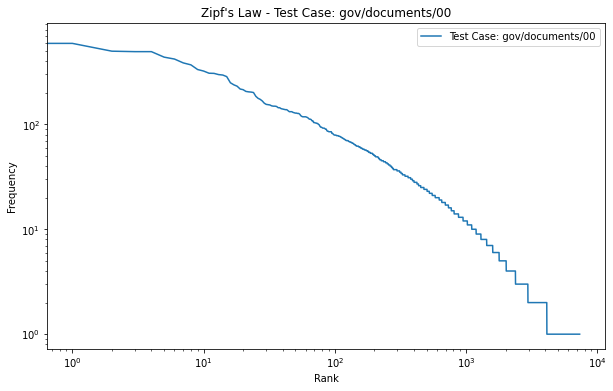

In [11]:
# Print out the analysis results
print("Collection Statistics:")
print(f"Total Tokens: {collection_stats['token_count']}")
print(f"Unique Tokens: {collection_stats['unique_tokens']}")
print(f"Min Tokens in a Document: {collection_stats['min_tokens']}")
print(f"Max Tokens in a Document: {collection_stats['max_tokens']}")
print(f"Mean Tokens per Document: {collection_stats['mean_tokens']}")
print("\nMost Common Unigrams:", collection_stats['unigrams'])
print("Most Common Bigrams:", collection_stats['bigrams'])
print("Most Common Trigrams:", collection_stats['trigrams'])
print("Most Common POS Tags:", collection_stats['pos_tags'])

# Visualize the Zipf's law
plot_zipf_law(collection_stats, "Test Case: gov/documents/00")